In [1]:
!pip install pyspark

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/25 16:57:30 WARN Utils: Your hostname, tika-VirtualBox, resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/10/25 16:57:30 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/25 16:57:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

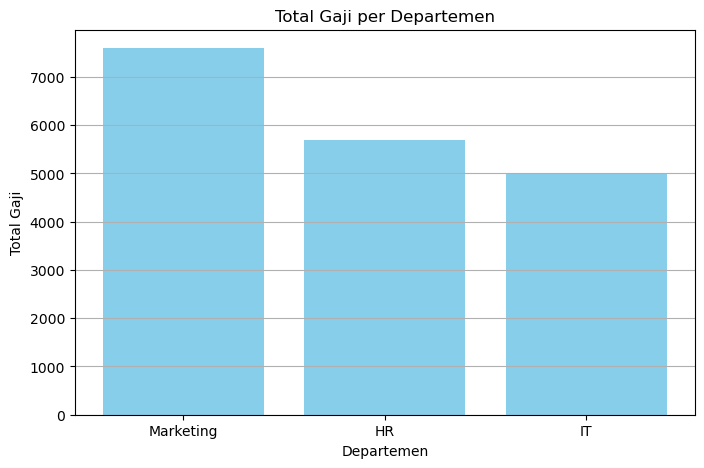

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Homework9').getOrCreate()

#Dataset
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 32, 'M', 2700, 1),
    ('Keyara', 25, 'F', 3500, 2),
    ('Ino', 45, 'M', 5000, 3),
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'IT')
], ['DeptId', 'DeptName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')

# Query SQL: total gaji dan jumlah karyawan per departemen
result = spark.sql('''
SELECT d.DeptName, SUM(e.Salary) AS TotalSalary,
COUNT(e.Name) AS EmployeeCount FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY TotalSalary DESC
''').toPandas()

# Visualisasi perbandingan total gaji
plt.figure(figsize=(8,5))
plt.bar(result['DeptName'], result['TotalSalary'], color='skyblue')
plt.title('Total Gaji per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Total Gaji')
plt.grid(axis='y')
plt.show()


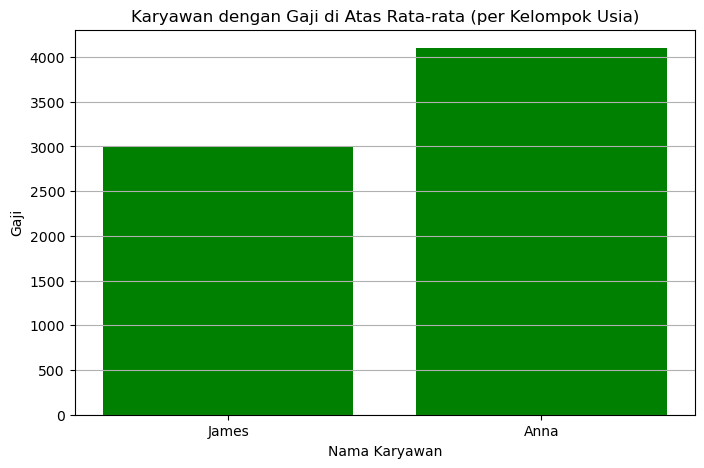

In [2]:
# Query SQL: karyawan dengan gaji di atas rata-rata di kelompok usia masing-masing
above_avg = spark.sql('''
SELECT e.Name, e.Age, e.Salary,
CASE WHEN e.Age < 30 THEN 'Under 30' WHEN e.Age
BETWEEN 30 AND 40 THEN '30-40'
ELSE 'Above 40' END AS AgeGroup,
AVG(e.Salary) OVER (PARTITION BY
CASE WHEN e.Age < 30 THEN 'Under 30'
WHEN e.Age BETWEEN 30 AND 40 THEN '30-40'
ELSE 'Above 40'
END) AS AvgSalary
FROM employees e
''')

above_avg.createOrReplaceTempView('salary_groups')

final = spark.sql('''
SELECT Name, AgeGroup, Salary, AvgSalary
FROM salary_groups
WHERE Salary > AvgSalary
''').toPandas()

# Visualisasi dalam bentuk grafik batang
plt.figure(figsize=(8,5))
plt.bar(final['Name'], final['Salary'], color='green')
plt.title('Karyawan dengan Gaji di Atas Rata-rata (per Kelompok Usia)')
plt.xlabel('Nama Karyawan')
plt.ylabel('Gaji')
plt.grid(axis='y')
plt.show()

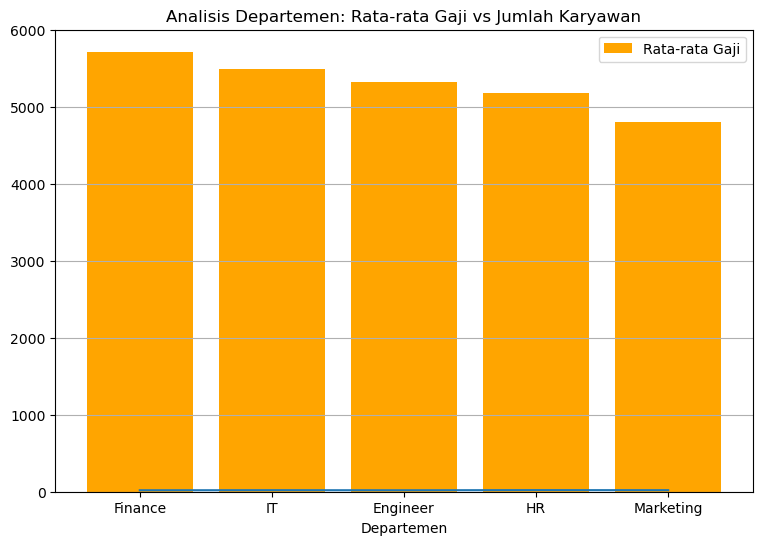

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Homework9No3').getOrCreate()

employees = spark.createDataFrame([
    ('Kartika', 28, 'F', 3200, 5),
    ('Musa', 45, 'M', 7100, 1),
    ('Putri', 34, 'F', 4500, 2),
    ('Wielino', 22, 'M', 2800, 4),
    ('Epen', 39, 'F', 5800, 3),
    ('Guntur', 31, 'M', 4100, 1),
    ('Ace', 26, 'F', 3400, 2),
    ('Mikhail', 50, 'M', 8200, 5),
    ('Ciko', 29, 'F', 3900, 3),
    ('Repushka', 36, 'M', 5100, 4),
    ('Keyara', 42, 'F', 6500, 1),
    ('Mondy', 24, 'M', 3000, 2),
    ('Tamara', 33, 'F', 4700, 5),
    ('Kaito', 48, 'M', 7800, 3),
    ('Rahma', 27, 'F', 3600, 4),
    ('Dewangga', 30, 'M', 4000, 1),
    ('Evelyn', 35, 'F', 5000, 2),
    ('Figo', 55, 'M', 9500, 1),
    ('Karezu', 23, 'F', 2900, 3),
    ('Riko', 41, 'M', 6200, 4),
    ('Vika', 38, 'F', 5500, 5),
    ('Rafli', 29, 'M', 3800, 2),
    ('Viki', 32, 'F', 4300, 1),
    ('Hendra', 46, 'M', 7500, 3),
    ('Scarlett', 25, 'F', 3300, 4),
    ('Nyoman', 37, 'M', 5300, 5),
    ('Grace', 43, 'F', 6800, 2),
    ('Michael', 28, 'M', 3700, 1),
    ('Chloe', 31, 'F', 4200, 3),
    ('Daniel', 49, 'M', 8000, 4),
    ('Victoria', 26, 'F', 3500, 5),
    ('Matthew', 34, 'M', 4800, 1),
    ('Riley', 30, 'F', 4100, 2),
    ('David', 52, 'M', 8800, 3),
    ('Zoe', 24, 'F', 3100, 4),
    ('Joseph', 40, 'M', 6000, 5),
    ('Madison', 36, 'F', 5200, 1),
    ('Samuel', 27, 'M', 3600, 2),
    ('Lily', 33, 'F', 4600, 3),
    ('John', 58, 'M', 10500, 4),
    ('Hannah', 22, 'F', 2700, 5),
    ('Andrew', 44, 'M', 7000, 1),
    ('Aria', 29, 'F', 3900, 2),
    ('Joshua', 35, 'M', 5000, 3),
    ('Layla', 31, 'F', 4300, 4),
    ('Christopher', 47, 'M', 7700, 5),
    ('Eleanor', 28, 'F', 3800, 1),
    ('Gabriel', 32, 'M', 4400, 2),
    ('Nora', 39, 'F', 5900, 3),
    ('Anthony', 53, 'M', 9000, 4),
    ('Mila', 25, 'F', 3400, 5),
    ('Ryan', 38, 'M', 5600, 1),
    ('Aubrey', 34, 'F', 4900, 2),
    ('Nathan', 42, 'M', 6600, 3),
    ('Ellie', 23, 'F', 3000, 4),
    ('Jonathan', 51, 'M', 8500, 5),
    ('Stella', 30, 'F', 4200, 1),
    ('Isaac', 26, 'M', 3500, 2),
    ('Penelope', 37, 'F', 5400, 3),
    ('Christian', 45, 'M', 7300, 4),
    ('Paisley', 29, 'F', 4000, 5),
    ('Caleb', 33, 'M', 4700, 1),
    ('Addison', 31, 'F', 4400, 2),
    ('Dylan', 48, 'M', 7900, 3),
    ('Hazel', 27, 'F', 3700, 4),
    ('Luke', 36, 'M', 5300, 5),
    ('Violet', 32, 'F', 4500, 1),
    ('Landon', 41, 'M', 6300, 2),
    ('Aurora', 24, 'F', 3200, 3),
    ('Isaiah', 56, 'M', 9800, 4),
    ('Savannah', 28, 'F', 3900, 5),
    ('Owen', 35, 'M', 5100, 1),
    ('Brooklyn', 30, 'F', 4300, 2),
    ('Levi', 43, 'M', 6800, 3),
    ('Claire', 26, 'F', 3600, 4),
    ('Wyatt', 39, 'M', 5800, 5),
    ('Skylar', 34, 'F', 4800, 1),
    ('Jack', 50, 'M', 8300, 2),
    ('Bella', 22, 'F', 2900, 3),
    ('Julian', 46, 'M', 7600, 4),
    ('Lucy', 33, 'F', 4700, 5),
    ('Aaron', 29, 'M', 4000, 1),
    ('Anna', 38, 'F', 5700, 2),
    ('Eli', 49, 'M', 8100, 3),
    ('Leah', 25, 'F', 3400, 4),
    ('Jayden', 37, 'M', 5500, 5),
    ('Sarah', 42, 'F', 6700, 1),
    ('Connor', 27, 'M', 3800, 2),
    ('Sadie', 31, 'F', 4400, 3),
    ('Charles', 54, 'M', 9300, 4),
    ('Camila', 23, 'F', 3100, 5),
    ('Carter', 40, 'M', 6100, 1),
    ('Naomi', 36, 'F', 5300, 2),
    ('Evan', 30, 'M', 4200, 3),
    ('Quinn', 35, 'F', 5100, 4),
    ('Thomas', 57, 'M', 10200, 5),
    ('Aaliyah', 24, 'F', 3300, 1),
    ('Josiah', 44, 'M', 7200, 2),
    ('Genesis', 28, 'F', 4000, 3)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])

departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing'),
    (3, 'IT'),
    (4, 'Finance'),
    (5, 'Engineer')
], ['DeptId', 'DeptName'])

employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')

analysis = spark.sql('''
SELECT d.DeptName,
    COUNT(*) AS TotalEmployees,
    AVG(e.Salary) AS AvgSalary,
    SUM(e.Salary) AS TotalSalary,
    MAX(e.Salary) AS MaxSalary,
    MIN(e.Salary) AS MinSalary
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
GROUP BY d.DeptName
ORDER BY AvgSalary DESC
''').toPandas()

# Visualisasi kombinasi
plt.figure(figsize=(9,6))
plt.bar(analysis['DeptName'], analysis['AvgSalary'], color='orange', label='Rata-rata Gaji')
plt.plot(analysis['DeptName'], analysis['TotalEmployees'])
plt.title('Analisis Departemen: Rata-rata Gaji vs Jumlah Karyawan')
plt.xlabel('Departemen')
plt.legend()
plt.grid(axis='y')
plt.show()